In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from scipy import stats

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Find the most recent date in the data set.
last_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(last_date)

('2017-08-23',)


In [10]:
# Calculate the date one year from the last date in data set.
query_date = dt.date(2017,8,23) - dt.timedelta(days=365)
print("Query Date :", query_date)

Query Date : 2016-08-23


In [11]:
# Perform a query to retrieve the data and precipitation scores
data = session.query(measurement.date, measurement.prcp).filter(measurement.date >= query_date).all()

In [12]:
# Save the query results as a Pandas DataFrame and set the index to the date column
climate_df = pd.DataFrame(data, columns = ["date", "prcp"])
climate_df.set_index("date", inplace=True)

In [13]:
# Sort the dataframe by date
climate_df = climate_df.sort_values(["date"])
climate_df.head(100)

,prcp
date,
2016-08-23,0.0
2016-08-23,NaN
2016-08-23,45.5
2016-08-23,1.3
2016-08-23,3.8
...,...
2016-09-07,1.3
2016-09-07,2.8
2016-09-07,2.5


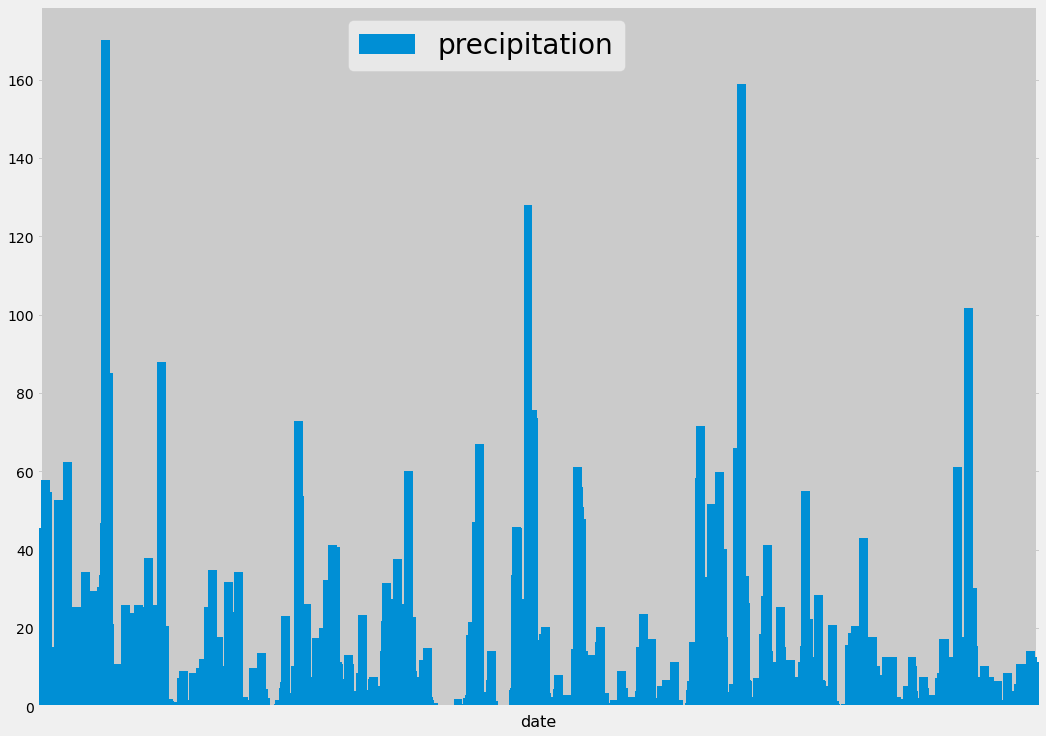

In [14]:
# Use Pandas Plotting with Matplotlib to plot the data
ax= climate_df.plot.bar(figsize=(16,12), width=20)
ax.set_xlabel("date", fontsize=16)
ax.set_xticklabels([])
plt.legend(['precipitation'], fontsize=28)
ax.get_legend().set_bbox_to_anchor((0.6, 1))

plt.show()

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
statistics = climate_df["prcp"].describe()
statistics_df = pd.DataFrame(statistics)
statistics_df.rename(columns = {"prcp": "precipitation"})

,precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number stations in the dataset
session.query(station).group_by(station.station).count()

9

In [17]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(measurement.station, func.count(measurement.date)).group_by(measurement.station).\
    order_by(func.count(measurement.date).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# Find the most active station.
most_active_station=session.query(measurement.station).group_by(measurement.station).\
    order_by(func.count(measurement.date).desc()).first()
most_active= most_active_station[0]
most_active

'USC00519281'

In [ ]:
# Calculate the lowest, highest, and average temperature.
session.query(measurement.station, func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station==most_active).all()

In [19]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data=session.query(measurement.tobs).filter(measurement.station==most_active).\
    filter(measurement.date>=query_date).all()
temp_data

[(25.0,),
 (25.0,),
 (26.7,),
 (26.7,),
 (23.9,),
 (22.8,),
 (25.6,),
 (25.0,),
 (25.6,),
 (26.7,),
 (26.7,),
 (25.6,),
 (25.6,),
 (25.6,),
 (22.8,),
 (23.3,),
 (26.7,),
 (26.1,),
 (25.0,),
 (26.7,),
 (24.4,),
 (26.1,),
 (23.9,),
 (26.1,),
 (25.6,),
 (26.1,),
 (25.6,),
 (25.6,),
 (24.4,),
 (23.3,),
 (25.0,),
 (25.6,),
 (26.1,),
 (26.1,),
 (25.0,),
 (26.7,),
 (25.6,),
 (25.6,),
 (25.6,),
 (25.0,),
 (26.1,),
 (26.1,),
 (26.1,),
 (26.1,),
 (23.9,),
 (24.4,),
 (22.8,),
 (22.2,),
 (21.7,),
 (25.0,),
 (26.1,),
 (25.6,),
 (26.1,),
 (25.0,),
 (26.1,),
 (25.0,),
 (25.6,),
 (25.6,),
 (25.6,),
 (25.6,),
 (25.0,),
 (23.3,),
 (23.9,),
 (24.4,),
 (22.8,),
 (24.4,),
 (23.3,),
 (25.0,),
 (24.4,),
 (24.4,),
 (23.3,),
 (23.9,),
 (23.9,),
 (23.9,),
 (23.9,),
 (21.7,),
 (17.2,),
 (21.1,),
 (20.0,),
 (19.4,),
 (25.0,),
 (23.3,),
 (25.0,),
 (24.4,),
 (24.4,),
 (23.9,),
 (24.4,),
 (23.9,),
 (22.8,),
 (23.9,),
 (22.8,),
 (23.9,),
 (23.3,),
 (23.9,),
 (23.3,),
 (23.9,),
 (22.8,),
 (23.9,),
 (22.8,),
 (22.8,),


In [20]:
# Create the dataframe
temp_df = pd.DataFrame(temp_data, columns=["tobs"])
temp_df.head()

,tobs
0,25.0
1,25.0
2,26.7
3,26.7
4,23.9


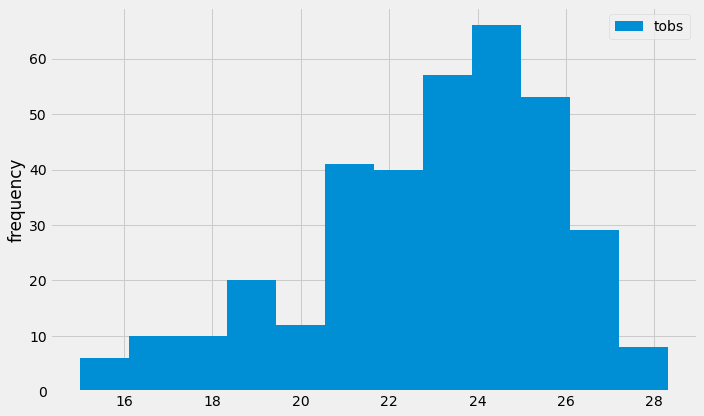

In [24]:
# Create histogram then save file as png
plt.figure(figsize=(10,6))
plt.hist(temp_df["tobs"], bins=12)
plt.ylabel("frequency")
plt.legend(["tobs"])
plt.tight_layout()
plt.show()


# Close session

In [ ]:
# Close Session
session.close()